# Unsupervised Learning
**Exploring text Clustering of Spotify Features.**

Data: https://www.kaggle.com/datasets/thedevastator/spotify-tracks-genre-dataset

Overall, I think the model has clustered very well! I stumbled a bit along the way and struggled with settling on final parameters however, I have learnt a lot about the process of exploring. I think this was a strong technique to use for this data set and task and that if was very effective in helping me reach the objective. I now have a very strong understanding of how to use the clustering technique and how it can be applied in real-life scenarios. Going back through the code upon realising I wanted to remove the ‘duration’ feature at first was very frustrating but in the end, it showed me the big difference selecting only the necessary features can make. It made my plots more readable and improved the mode. I am interested in taking this exercise further and looking at a larger number of clusters, to see if the model is consistent with clustering the genres with more clustering groups available. I’d also like to take my own music that has been released and seeing how Spotify sees the music in terms of its audio features and explore how that impacts where my songs are recommended through their algorithm.  

In [229]:
import random, os, sys, shutil
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [232]:
#Read in csv
df = pd.read_csv("../intro_to_ds_portfolio/portfolio/data/spotifygenres.csv")
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [202]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [228]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [227]:
df["duration_ms"].sort_values()

65900          0
59310       8586
59812      13386
59775      15800
16856      17453
          ...   
73840    4563897
24348    4730302
10935    4789026
10984    4789026
73617    5237295
Name: duration_ms, Length: 114000, dtype: int64

In [204]:
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='plasma')
# I did this in the mushroom-classification notebook
# https://medium.com/geekculture/how-to-color-your-pandas-dataframe-118cb3c0aafc

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Unnamed: 0,1.000000,0.032142,-0.032743,-0.054736,0.003444,-0.055994,-0.005520,-0.027307,0.005107,-0.084952,0.076840,-0.070286,0.033639,0.053111,-0.025824,-0.021115
popularity,0.032142,1.000000,-0.007101,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073
duration_ms,-0.032743,-0.007101,1.000000,-0.065263,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225
explicit,-0.054736,0.044082,-0.065263,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816,0.038386
danceability,0.003444,0.035448,-0.073426,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218
energy,-0.055994,0.001056,0.058523,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126
key,-0.005520,-0.003853,0.008114,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065
loudness,-0.027307,0.050423,-0.003470,0.108588,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992
mode,0.005107,-0.013931,-0.035556,-0.037212,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092
speechiness,-0.084952,-0.044927,-0.062600,0.307952,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011


In [205]:
df_dropped = df.drop(columns = ["Unnamed: 0",'track_id', 'artists', 'album_name', 'track_name','track_genre', 'duration_ms'])

### Standardise 

First we have to standardise the range of the dataset, as PCA and K-Means are effected by scale.

In [207]:
x = df_dropped
x = x.dropna()


In [208]:
x_scaled = StandardScaler().fit_transform(x)

### Plot in 2D

Now we can use PCA to reduce the dataset to only 2 dimensions. This means we can plot it on a 2D axis.

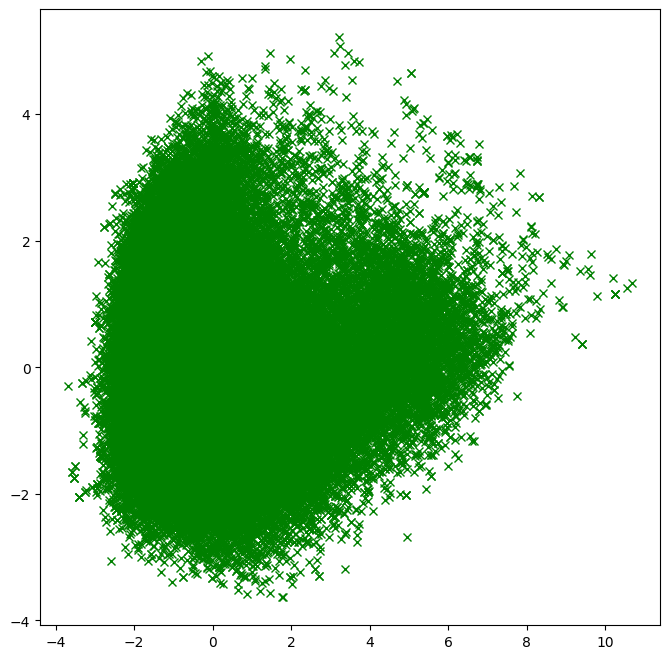

In [209]:
#Get reduced dimensions
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x_scaled)

#Plot
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"gx")

In [210]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)
    plot_centroids(clusterer.cluster_centers_)

/Users/loiskelly/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/loiskelly/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/loiskelly/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/loiskelly/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/loiskelly/min

([<matplotlib.axis.XTick at 0x2cb245e50>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20')])

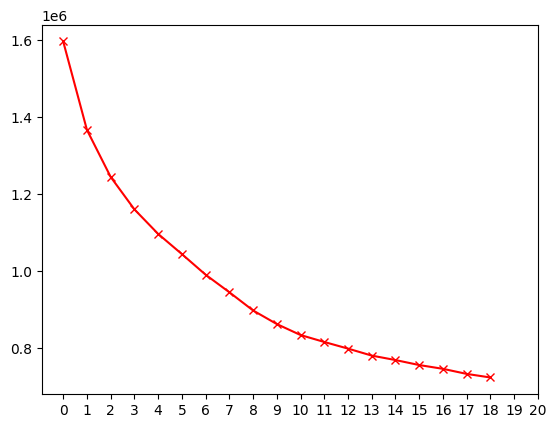

In [211]:
# ELbow Plot
scores=[]
for i in range(1,20):
    #Fit for k
    means=KMeans(n_clusters=i)
    means.fit(x_scaled)
    #Get inertia
    scores.append(means.inertia_)
plt.plot(scores,"-rx")
plt.xticks(np.arange(0, 21, 1.0))

/Users/loiskelly/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



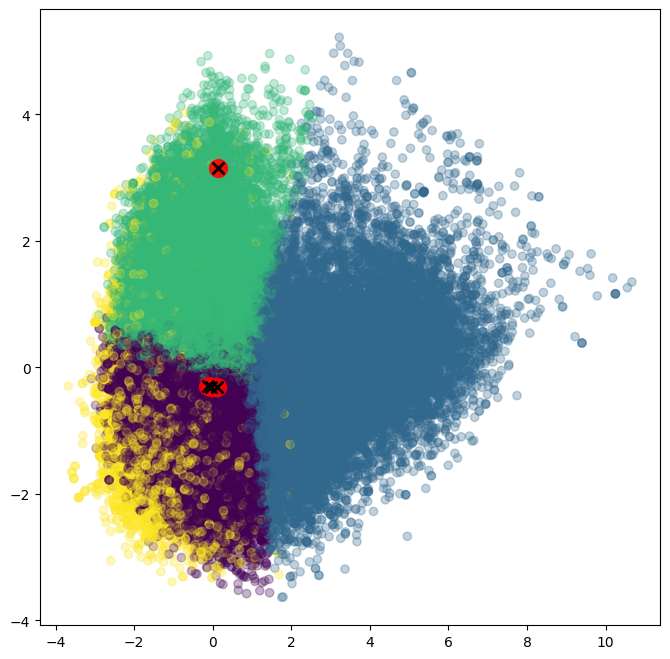

In [212]:
k= 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_scaled)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x_scaled)


/Users/loiskelly/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/loiskelly/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0.38559094556595624

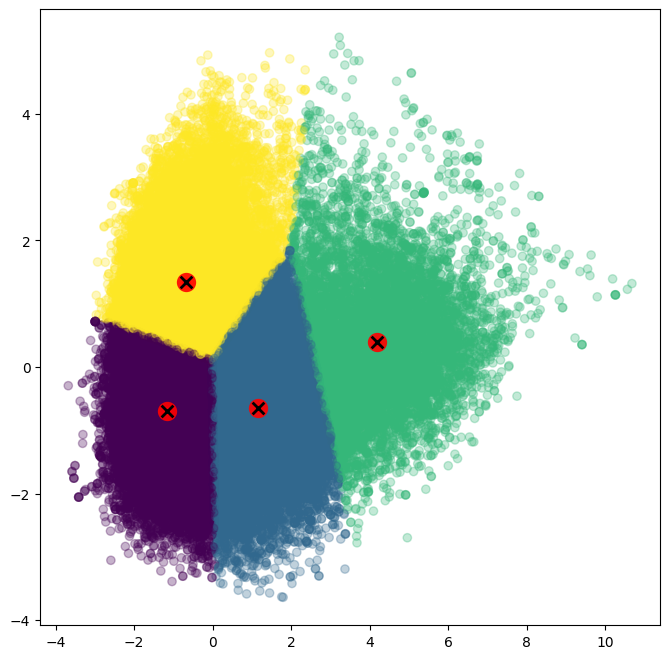

In [213]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 2
#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x_scaled)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results on 2D plot
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)
metrics.silhouette_score(x_less_dimensions, kmeans.fit_predict(x_less_dimensions))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

/var/folders/5h/m30z34ld513d_401ljl8fq600000gn/T/ipykernel_78370/3308339689.py:14: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



Text(0.5, 0, 'cluster number')

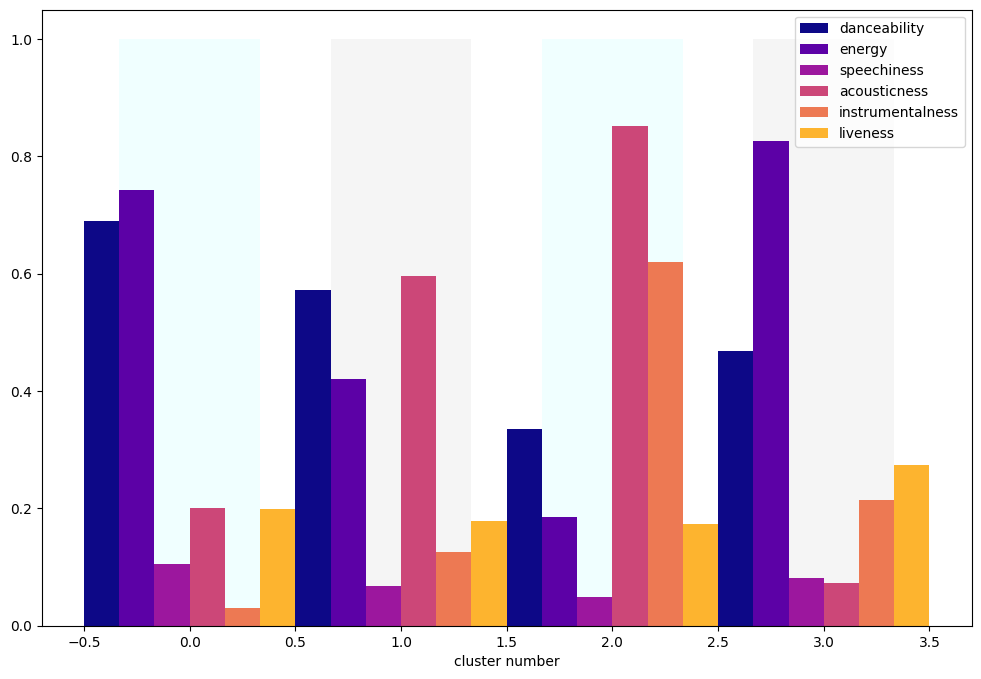

In [214]:
#Add cluster labels as extra column in dataframe
labels = kmeans.predict(x_less_dimensions)
x["cluster"] = labels

#Pick some features to plot
features = ['danceability', 'energy', 'speechiness', 'acousticness','instrumentalness', 'liveness']
width = 1/(len(features))

fig,ax = plt.subplots(figsize=(12, 8))

for i in range(k):
    ax.bar([i],[1],width=width*4,color = "azure" if i%2==0 else "whitesmoke")

cmap = plt.cm.get_cmap('plasma')
#Iterate through features
for index, f in enumerate(features):
    #Get mean for each feature for each cluster
    data = [np.mean(x[x["cluster"]==i][f]) for i in range(k)]
    
    x_vals = np.arange(len(data)) + (width*index) - 0.5 + width/2
    
    #Plot this feature for each cluster
    ax.bar(x_vals, data, width = width, label = f, color = cmap(index/len(features)))
    
ax.legend()
ax.set_xlabel("cluster number")



In [215]:
x

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,73,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,55,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,2
2,57,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,1
3,71,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,2
4,82,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,2
113996,22,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,2
113997,22,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,1
113998,41,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,1


In [216]:
x['cluster'].describe()
# https://www.geeksforgeeks.org/how-to-count-occurrences-of-specific-value-in-pandas-column/

count    114000.000000
mean          1.291816
std           1.243399
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           3.000000
Name: cluster, dtype: float64

In [217]:
# mean of each feature in each cluster 
# Most average song of each cluster? 

In [218]:
x['genre'] = df["track_genre"]
cluster0 = pd.DataFrame(x[x['cluster'] == 0])
cluster0.describe()


,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,42901.000000,42901.000000,42901.000000,42901.000000,42901.000000,42901.000000,42901.000000,42901.000000,42901.000000,42901.000000,42901.000000,42901.000000,42901.000000,42901.0
mean,33.986527,0.689639,0.742606,5.510128,-6.120848,0.606816,0.105755,0.200632,0.030548,0.198979,0.669105,120.639212,4.001072,0.0
std,24.175119,0.109366,0.136903,3.594676,2.349778,0.488463,0.126809,0.214432,0.128176,0.172063,0.195746,26.024983,0.181803,0.0
min,0.000000,0.252000,0.180000,0.000000,-20.443000,0.000000,0.022100,0.000002,0.000000,0.009250,0.034600,39.872000,1.000000,0.0
25%,12.000000,0.612000,0.648000,2.000000,-7.477000,0.000000,0.039200,0.028200,0.000000,0.090600,0.535000,99.999000,4.000000,0.0
50%,36.000000,0.690000,0.750000,6.000000,-5.822000,1.000000,0.057400,0.121000,0.000002,0.131000,0.690000,120.031000,4.000000,0.0
75%,52.000000,0.768000,0.852000,9.000000,-4.463000,1.000000,0.113000,0.310000,0.000300,0.260000,0.824000,134.994000,4.000000,0.0
max,100.000000,0.985000,1.000000,11.000000,1.821000,1.000000,0.965000,0.988000,0.968000,0.990000,0.995000,219.571000,5.000000,0.0


<Axes: title={'center': 'Cluster0 Genres'}, ylabel='genre'>

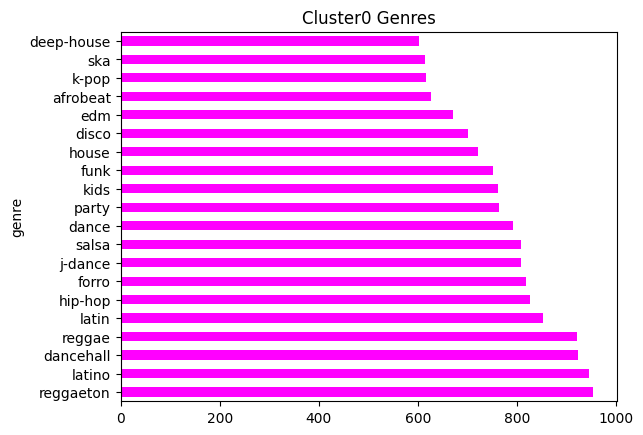

In [219]:
cluster0_genre = cluster0["genre"].value_counts()[:20]
cluster0["genre"].value_counts()[:20].plot(title= 'Cluster0 Genres',kind = 'barh', colormap='spring')
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

In [220]:
cluster1 = pd.DataFrame(x[x['cluster'] == 1])
cluster1.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,28374.000000,28374.000000,28374.000000,28374.000000,28374.000000,28374.000000,28374.000000,28374.000000,28374.000000,28374.000000,28374.000000,28374.000000,28374.000000,28374.0
mean,33.955064,0.572353,0.420625,5.065236,-10.532395,0.723691,0.068077,0.596681,0.125321,0.178166,0.435785,112.881520,3.872700,1.0
std,21.681088,0.138448,0.142211,3.505640,3.160413,0.447180,0.108907,0.270909,0.280059,0.153698,0.220119,27.300855,0.442682,0.0
min,0.000000,0.062900,0.000020,0.000000,-31.953000,0.000000,0.022100,0.000003,0.000000,0.011600,0.006710,30.322000,0.000000,1.0
25%,18.000000,0.479000,0.320000,2.000000,-12.472000,0.000000,0.031100,0.413000,0.000000,0.098700,0.264000,90.847750,4.000000,1.0
50%,37.000000,0.574000,0.424000,5.000000,-10.164000,1.000000,0.037900,0.658000,0.000021,0.118000,0.404000,112.211500,4.000000,1.0
75%,51.000000,0.671000,0.519000,8.000000,-8.244250,1.000000,0.056000,0.815000,0.012275,0.190000,0.589000,130.002000,4.000000,1.0
max,94.000000,0.976000,0.998000,11.000000,-1.121000,1.000000,0.963000,0.996000,0.982000,0.997000,0.988000,243.372000,5.000000,1.0


genre
tango                870
honky-tonk           826
cantopop             738
study                725
jazz                 695
mandopop             645
songwriter           644
singer-songwriter    644
acoustic             624
romance              580
show-tunes           578
chill                573
rock-n-roll          570
bluegrass            560
indian               543
folk                 513
indie                476
soul                 472
pop-film             471
sad                  466
Name: count, dtype: int64


<Axes: title={'center': 'Cluster1 Genres'}, ylabel='genre'>

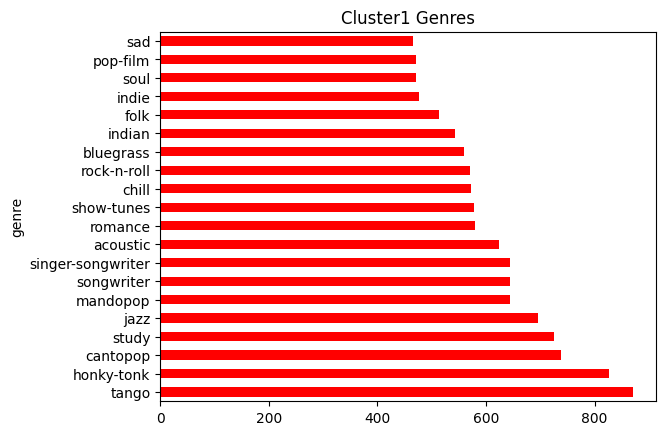

In [221]:
cluster1_genre = cluster1["genre"].value_counts()[:20]
print(cluster1_genre)
cluster1["genre"].value_counts()[:20].plot(title= 'Cluster1 Genres',kind = 'barh', colormap='autumn')

In [222]:
cluster2 = pd.DataFrame(x[x['cluster'] == 2])
cluster2.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,9282.000000,9282.000000,9282.000000,9282.000000,9282.000000,9282.000000,9282.000000,9282.000000,9282.000000,9282.000000,9282.000000,9282.000000,9282.000000,9282.0
mean,27.447641,0.334532,0.184625,4.786792,-19.759640,0.675178,0.048643,0.851477,0.619712,0.173895,0.175357,103.887006,3.491166,2.0
std,20.954507,0.163002,0.166869,3.461069,6.495013,0.468334,0.038207,0.220962,0.392254,0.170099,0.156150,34.483585,0.937192,0.0
min,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,8.000000,0.203000,0.066525,2.000000,-23.625000,0.000000,0.035100,0.835000,0.093225,0.098200,0.056400,79.073000,3.000000,2.0
50%,24.000000,0.327000,0.146000,5.000000,-18.874500,1.000000,0.040900,0.940000,0.859000,0.112000,0.134000,97.708000,4.000000,2.0
75%,46.000000,0.446000,0.253000,8.000000,-14.961000,1.000000,0.049600,0.982000,0.924000,0.151000,0.244000,127.877500,4.000000,2.0
max,85.000000,0.880000,1.000000,11.000000,-0.689000,1.000000,0.918000,0.996000,1.000000,0.994000,0.976000,220.525000,5.000000,2.0


genre
sleep          886
new-age        824
classical      766
ambient        712
opera          572
piano          568
disney         499
iranian        485
guitar         440
romance        369
german         315
idm            303
show-tunes     196
jazz           187
british        183
anime          146
study          133
world-music    133
chill           95
tango           74
Name: count, dtype: int64


<Axes: title={'center': 'Cluster2 Genres'}, ylabel='genre'>

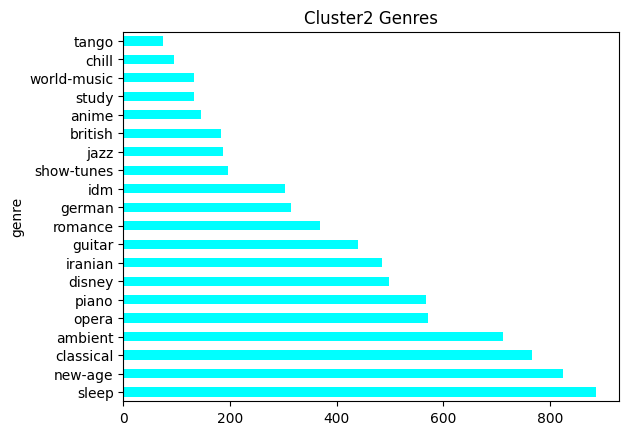

In [223]:
cluster2_genre = cluster2["genre"].value_counts()[:20]
print(cluster2_genre)
cluster2["genre"].value_counts()[:20].plot(title= 'Cluster2 Genres',kind = 'barh', colormap='cool')

In [224]:
cluster3 = pd.DataFrame(x[x['cluster'] == 3])
cluster3.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,33443.000000,33443.000000,33443.000000,33443.000000,33443.000000,33443.000000,33443.000000,33443.000000,33443.000000,33443.000000,33443.000000,33443.000000,33443.000000,33443.0
mean,33.278324,0.468975,0.825602,5.403223,-5.880927,0.593458,0.081639,0.073521,0.214427,0.273279,0.339261,137.013163,3.920731,3.0
std,20.373938,0.140559,0.142836,3.562011,2.518661,0.491195,0.076415,0.140796,0.335030,0.228386,0.197791,29.034120,0.353664,0.0
min,0.000000,0.051300,0.222000,0.000000,-22.398000,0.000000,0.022600,0.000000,0.000000,0.013300,0.000000,36.950000,0.000000,3.0
25%,19.000000,0.377000,0.728000,2.000000,-7.280000,0.000000,0.040200,0.000628,0.000001,0.107000,0.183000,119.898500,4.000000,3.0
50%,34.000000,0.475000,0.867000,6.000000,-5.567000,1.000000,0.056400,0.008620,0.001130,0.188000,0.317000,135.984000,4.000000,3.0
75%,49.000000,0.560000,0.945000,9.000000,-4.139000,1.000000,0.093000,0.071800,0.399000,0.354000,0.475000,158.070000,4.000000,3.0
max,98.000000,0.970000,1.000000,11.000000,4.532000,1.000000,0.962000,0.947000,0.999000,1.000000,0.988000,222.605000,5.000000,3.0


genre
grindcore            988
death-metal          965
black-metal          948
metalcore            878
drum-and-bass        867
happy                862
hardstyle            862
heavy-metal          862
trance               820
dubstep              734
grunge               721
metal                709
industrial           660
goth                 610
breakbeat            607
progressive-house    584
techno               573
hard-rock            569
hardcore             563
dub                  553
Name: count, dtype: int64


<Axes: title={'center': 'Cluster3 Genres'}, ylabel='genre'>

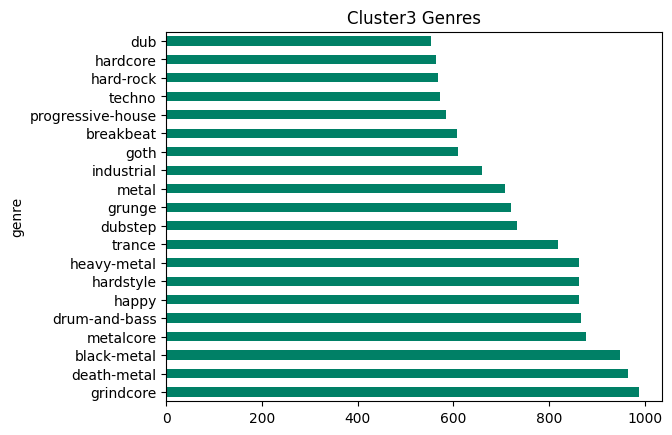

In [225]:
cluster3_genre = cluster3["genre"].value_counts()[:20]
print(cluster3_genre)
cluster3["genre"].value_counts()[:20].plot(title= 'Cluster3 Genres',kind = 'barh', colormap='summer')